In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path
import re
import requests
from io import StringIO
import random
import pdb
from io import BytesIO
import geopandas as gpd

!pip install requests pandas
import requests

# Directories
for d in ["raw_data"]:
    if not os.path.isdir(d):
        os.mkdir(d)

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Bring land use data from Gipuzkoa Irekia, related to locals
Bienes Inmuebles de Naturaleza Urbana existentes en el Catastro de Gipuzkoa

https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/detail/detailView/1d7a519e-5248-4e87-85f7-ecf3d00a1e52

In [2]:
# List with all the urls to local data of the 34 towns in the analysis

urls_locales=['https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c6abbdeb-2583-420d-b6f1-46f37874dbf9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/38f8aa02-307d-48d8-a5fa-eed285d13180',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/b36a2241-b4c4-45fb-8ce4-523c9716741a',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c0ee5e2b-71ce-4c89-8ba9-7a9ef7f4b1b5',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c255519e-d335-406a-be8d-8f2e469ba3f9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/32865b0e-e05e-4b87-8211-61e8526aba6c',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/873c1579-3893-4e44-a221-9a399465593f',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/876d7968-d6b2-4b8c-bbae-899bb35444f6',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/f423a594-00e7-4f4c-9ebf-f3ff352cef51',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/1bd56664-f2b7-42b0-ba25-e54b3d960726',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/4a807b4f-1302-4384-b1fb-bf420ff9f03d',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/1ddf5167-6159-4f7a-b43f-c6e7e92225ba',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/313dc81d-0f1a-4cd8-82e6-d81ae90e5019',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/12088aca-f753-4dd7-814d-4ac5506c41e7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/9c6c71ae-d062-4fa2-b28e-55a9ba9f8de9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/70dc4dae-d5ed-4397-8ef0-d56f46060b33',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/2722f0eb-7ef2-4c4d-baca-454353f5caed',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/ff1c3ce6-bb6b-4211-9f76-2faacde64ce7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c1ef8ad8-655a-48fd-8d76-44964f265011',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/7a32f635-e606-44f2-bf8e-3f12468a88d2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/080bfc9b-1909-4832-a428-e92c32cffa2d',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/6498dbc2-71c8-4629-9103-9abafe6374b2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/cdf57eda-5acc-4662-ad98-32c516352027',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/24a8f343-293d-426c-b6ab-7d66e75b8d58',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/6822ee92-e76f-4f53-b192-fbd102fb7763',

      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/de6fa074-0792-4951-89c7-e08d4eae5340',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/805740c6-e11f-43b8-9dbd-7edc994da6b7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/fbdd7aa7-f1c1-4149-bc74-3995a7c13c2f',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/03bfc3a4-c0d4-491e-a163-ef983aa0403a',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/8773c064-1976-409f-a355-7847f8420d09',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/62434408-12b5-4a7a-84ba-22d5ca426a72',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/e4ab4c6e-af2d-4c9d-b632-8e933193cef2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/0fa7d40a-81f4-49c3-9414-182ab6fc70e3'
      ]
len(urls_locales)

33

In [3]:
# Donosti has a unique url but 4 files, I download them manually

locales_donosti_df = []

locales_donosti = [f"raw_data/locales_donostia/ficherourbanalocalesmunicipio69.csv",
                   f"raw_data/locales_donostia/ficherourbanalocalesmunicipio69-2.csv",
                   f"raw_data/locales_donostia/ficherourbanalocalesmunicipio69-3.csv",
                   f"raw_data/locales_donostia/ficherourbanalocalesmunicipio69-4.csv"]

for path in locales_donosti:
    df = gpd.read_file(path, encoding='latin1')
    locales_donosti_df.append(df)
locales_donosti_df = pd.concat(locales_donosti_df, ignore_index=True)
locales_donosti_df = locales_donosti_df.drop(columns='geometry')
locales_donosti_df['Mun'] = locales_donosti_df['Mun'].astype(int)
locales_donosti_df

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,69,7494001,6036420,V,P,001,001,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,V,"153,50"
1,69,7494001,6036420,V,,002,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"53,29"
2,69,7494001,6036420,V,,003,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"53,29"
3,69,7494001,6036420,V,,004,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"147,00"
4,69,7494002,6049056,F,P,001,001,3590,"PADRE ORKOLAGA, PASEO DEL",204,,00,,V,"113,27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231698,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"80,00"
231699,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"50,00"
231700,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"100,00"
231701,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"120,00"


In [4]:
# 591914 locals in Gipuzkoa, in the 34 towns

locales = pd.DataFrame()

for url in urls_locales:
  response = requests.get(url)
  content = response.content.decode('ISO-8859-1')
  csv_data = BytesIO(content.encode('utf-8'))
  df_provisional=pd.read_csv(csv_data, sep=";", index_col=False, low_memory=False)
  locales = pd.concat([locales, df_provisional], ignore_index=True)
locales.rename(columns={'Descripción Vía               ': 'Descripción Vía', 'N.Fijo ': 'N.Fijo'}, inplace=True)
locales

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,"225,00"
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,"190,00"
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,"15,00"
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,"50,00"
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,"210,37"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592342,80,5773001,123568,Q,P,1,1,1720,DISEMINADOS,039Y,,00,,V,"116,00"
592343,80,5773001,123568,Q,,2,1,1720,DISEMINADOS,039Y,,00,,B,"263,00"
592344,80,5773001,123568,Q,,3,1,1720,DISEMINADOS,039Y,,01,,V,"58,00"
592345,80,5773001,123568,Q,,4,1,1720,DISEMINADOS,039Y,,01,,B,"131,00"


In [5]:
# Add Donosti's locals to the rest
locales = pd.concat([locales, locales_donosti_df], ignore_index=True)
locales

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,"225,00"
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,"190,00"
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,"15,00"
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,"50,00"
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,"210,37"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824045,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"80,00"
824046,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"50,00"
824047,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"100,00"
824048,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"120,00"


In [6]:

locales['Mun'] = pd.to_numeric(locales['Mun'], errors='coerce')
locales = locales.dropna(subset=['Mun'], axis=0)

# float64 to int 'Mun'

locales['Mun'] = locales['Mun'].astype(int)

locales['Superfic'] = locales['Superfic'].str.replace(',', '.')
locales['Superfic'] = locales['Superfic'].astype(float)

locales

C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\2938341254.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['Mun'] = locales['Mun'].astype(int)
C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\2938341254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['Superfic'] = locales['Superfic'].str.replace(',', '.')
C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\2938341254.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,225.00
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,190.00
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,15.00
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,50.00
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,210.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824045,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,80.00
824046,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,50.00
824047,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,100.00
824048,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,120.00


In [7]:
# From symbol to real use

usos = {
    'De': ['A ','B ','C ','D ','E ','G ','H ','I ','J ','K ','L ','M ','N ','O ','P ','Q ','R ','S ','T ','U ','V ','W ','X ','Y ','Z '],
    'Destino': ['Cultural', 'Agropecuario', 'Local Comercial','Deposito','Educativo','Garaje Cerrado','Hosteleria','Industrial','Jardin','Deportivo','Edificabilidad','Almacen','Sanidad','Oficina','Plaza Parking','Altura menor 1.5 mts','Religioso','Solar','Trastero','Obras Urbanizacion','Vivienda','Accesos y pasillos','Duplex','Espectaculos','Terraza']
}
usos = pd.DataFrame(usos)

mapeo = dict(zip(usos['De'], usos['Destino']))

locales['De'] = locales['De'].replace(mapeo)
locales.rename(columns={'Referen': 'Referencia'}, inplace=True)
locales=locales.reset_index()
locales=locales.drop(columns='index')
locales['Superfic'] = locales['Superfic'].astype(int)
locales


C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\617981714.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['De'] = locales['De'].replace(mapeo)
C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\617981714.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales.rename(columns={'Referen': 'Referencia'}, inplace=True)


,Mun,Referencia,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,Agropecuario,225
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,Trastero,190
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,Vivienda,15
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,Vivienda,50
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,Vivienda,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824044,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,Agropecuario,80
824045,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,Trastero,50
824046,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,Trastero,100
824047,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,Agropecuario,120


Group buildings in RC

Show all the land uses and their percentage for each building

In [8]:

# Group, calculate percentages and group repeated destinations
def custom_apply(group):
    destinos = []
    porcentajes = []
    superficie_total = {}


    for destino, area in zip(group['De'], group['Superfic']):
        if destino not in destinos:
            destinos.append(destino)
            porcentajes.append(0)
            superficie_total[destino] = 0

        index = destinos.index(destino)
        porcentajes[index] += (area / group['Superfic'].sum()) * 100
        superficie_total[destino] += area

    return (destinos, porcentajes, superficie_total)

grouped = locales.groupby('Referencia').apply(custom_apply)

# Create new df
analisis_x_referencia = {'Referencia': [], 'Destinos': [], 'Porcentajes': [], 'Superficie Total': []}
for referencia, (destinos, porcentajes, superficie_total) in grouped.items():
    analisis_x_referencia['Referencia'].append(referencia)
    analisis_x_referencia['Destinos'].append(destinos)
    analisis_x_referencia['Porcentajes'].append([round(p, 2) for p in porcentajes])
    analisis_x_referencia['Superficie Total'].append([superficie_total[d] for d in destinos])

analisis_x_referencia = pd.DataFrame(analisis_x_referencia)
analisis_x_referencia

,Referencia,Destinos,Porcentajes,Superficie Total
0,3768001,"[Vivienda, Trastero]","[66.67, 33.33]","[140, 70]"
1,3768002,"[Vivienda, Trastero, Agropecuario]","[39.37, 47.24, 13.39]","[250, 300, 85]"
2,3768003,"[Agropecuario, Vivienda, Trastero, Deposito]","[27.51, 38.46, 33.14, 0.89]","[186, 260, 224, 6]"
3,3768004,"[Vivienda, Garaje Cerrado]","[68.27, 31.73]","[370, 172]"
4,3769001,[Vivienda],[100.0],[224]
...,...,...,...,...
45094,9999255,[Solar],[100.0],[603]
45095,9999256,"[Garaje Cerrado, Trastero]","[98.19, 1.81]","[217, 4]"
45096,9999257,[Solar],[100.0],[4465]
45097,9999258,[Solar],[100.0],[3044]


In [9]:
# Add town code to analisis_x_referencia

columnas=['Mun','Referencia']
mun_referencia=locales[columnas]
mun_referencia = mun_referencia.drop_duplicates(subset=['Referencia'])
mun_referencia = mun_referencia.reset_index()
mun_referencia = mun_referencia.drop(columns='index')

analisis_x_referencia = analisis_x_referencia.merge(mun_referencia, on='Referencia', how='left')
analisis_x_referencia

,Referencia,Destinos,Porcentajes,Superficie Total,Mun
0,3768001,"[Vivienda, Trastero]","[66.67, 33.33]","[140, 70]",55
1,3768002,"[Vivienda, Trastero, Agropecuario]","[39.37, 47.24, 13.39]","[250, 300, 85]",55
2,3768003,"[Agropecuario, Vivienda, Trastero, Deposito]","[27.51, 38.46, 33.14, 0.89]","[186, 260, 224, 6]",55
3,3768004,"[Vivienda, Garaje Cerrado]","[68.27, 31.73]","[370, 172]",55
4,3769001,[Vivienda],[100.0],[224],55
...,...,...,...,...,...
45094,9999255,[Solar],[100.0],[603],45
45095,9999256,"[Garaje Cerrado, Trastero]","[98.19, 1.81]","[217, 4]",45
45096,9999257,[Solar],[100.0],[4465],45
45097,9999258,[Solar],[100.0],[3044],45


In [10]:
analisis_x_referencia.to_csv(f"secondary_data/analisis_x_referencia.csv", index=False)

In [11]:
analisis_x_referencia = pd.read_csv(f"secondary_data/analisis_x_referencia.csv")

In [12]:
# locales.to_csv(f"secondary_data/locales.csv", index=False)

In [ ]:
# locales = pd.read_csv(f"secondary_data/locales.csv")

# Bring land use data from Gipuzkoa Irekia, related to referencias catastrales

This info is great because clasifies each RC with one use

Info about land uses in locals is more precise, but confusing

# Bring shapefiles with buildings

From "Catastro" webpage

Each row is a RC, that can be seen as a building

Number of RC is the same as the obtained from the local files

https://ssl6.gipuzkoa.eus/CATASTRO/map.htm?id=74&idioma=esp

Many times, each RC is a unique building and inside the building there are locals with different land uses

Other times, a RC is many buildings, and each building has locals with dif. land uses

In [13]:
buildings_catastro = []

paths_shapefiles=[f"raw_data/buildings_gipuzkoa/SHP-A009/009_HIRILUR_SHP/PARTZELAK-A009.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A013/013_HIRILUR_SHP/PARTZELAK-A013.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A017/017_HIRILUR_SHP/PARTZELAK-A017.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A018/018_HIRILUR_SHP/PARTZELAK-A018.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A019/019_HIRILUR_SHP/PARTZELAK-A019.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A029/029_HIRILUR_SHP/PARTZELAK-A029.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A030/030_HIRILUR_SHP/PARTZELAK-A030.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A032/032_HIRILUR_SHP/PARTZELAK-A032.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A036/036_HIRILUR_SHP/PARTZELAK-A036.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A040/040_HIRILUR_SHP/PARTZELAK-A040.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A045/045_HIRILUR_SHP/PARTZELAK-A045.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A049/049_HIRILUR_SHP/PARTZELAK-A049.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A051/051_HIRILUR_SHP/PARTZELAK-A051.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A053/053_HIRILUR_SHP/PARTZELAK-A053.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A055/055_HIRILUR_SHP/PARTZELAK-A055.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A056/056_HIRILUR_SHP/PARTZELAK-A056.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A059/059_HIRILUR_SHP/PARTZELAK-A059.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A061/061_HIRILUR_SHP/PARTZELAK-A061.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A063/063_HIRILUR_SHP/PARTZELAK-A063.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A064/064_HIRILUR_SHP/PARTZELAK-A064.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A067/067_HIRILUR_SHP/PARTZELAK-A067.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A069/069_HIRILUR_SHP/PARTZELAK-A069.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A071/071_HIRILUR_SHP/PARTZELAK-A071.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A072/072_HIRILUR_SHP/PARTZELAK-A072.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A073/073_HIRILUR_SHP/PARTZELAK-A073.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A074/074_HIRILUR_SHP/PARTZELAK-A074.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A075/075_HIRILUR_SHP/PARTZELAK-A075.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A076/076_HIRILUR_SHP/PARTZELAK-A076.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A077/077_HIRILUR_SHP/PARTZELAK-A077.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A079/079_HIRILUR_SHP/PARTZELAK-A079.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A080/080_HIRILUR_SHP/PARTZELAK-A080.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A081/081_HIRILUR_SHP/PARTZELAK-A081.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A083/083_HIRILUR_SHP/PARTZELAK-A083.shp",
                  f"raw_data/buildings_gipuzkoa/SHP-A084/084_HIRILUR_SHP/PARTZELAK-A084.shp"
                  ]
for path in paths_shapefiles:
    df = gpd.read_file(path)
    buildings_catastro.append(df)
buildings_catastro = pd.concat(buildings_catastro, ignore_index=True)
buildings_catastro

,REFCAT,Herria,ZCAT,geometry
0,7984046,009,900,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,009,900,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,009,900,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,009,900,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,009,900,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...,...
45133,8693041,084,900,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45134,8491186,084,802,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45135,8893002,084,900,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45136,8893003,084,900,"POLYGON ((587961.921 4793110.765, 587953.302 4..."


In [14]:
# Rename columns so that they match
buildings_catastro.rename(columns={'REFCAT': 'Referencia'}, inplace=True)
buildings_catastro.rename(columns={'Herria': 'Mun'}, inplace=True)
buildings_catastro = buildings_catastro.drop(columns='ZCAT')

buildings_catastro['Mun'] = buildings_catastro['Mun'].str.lstrip('0')

# str to int64 so that they coincide with the other df
buildings_catastro['Mun'] = pd.to_numeric(buildings_catastro['Mun'], errors='coerce', downcast='integer')
buildings_catastro['Mun'] = buildings_catastro['Mun'].astype(np.int64)
buildings_catastro

,Referencia,Mun,geometry
0,7984046,9,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,9,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,9,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,9,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,9,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...
45133,8693041,84,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45134,8491186,84,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45135,8893002,84,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45136,8893003,84,"POLYGON ((587961.921 4793110.765, 587953.302 4..."


# Add Land Use to GeoDataFrame

In [15]:
# When saving, the type sometimes changes

buildings_catastro['Referencia'] = buildings_catastro['Referencia'].astype('int64')

# List chain to list of ints
def str_to_int_list(s):
    return [int(x) for x in s.strip("[] ").split(",")]

# Apply function
analisis_x_referencia['Superficie Total'] = analisis_x_referencia['Superficie Total'].apply(str_to_int_list)

In [16]:
# ANALYSIS 1)

buildings_1 = pd.merge(buildings_catastro, analisis_x_referencia, on='Referencia', how='inner')
buildings_1 = buildings_1.drop(columns='Mun_y')
buildings_1 = buildings_1.rename(columns={'Mun_x': 'Municipio','Referencia': 'Referencia catastral'})

import ast
buildings_1['Destinos'] = buildings_1['Destinos'].apply(lambda x: ast.literal_eval(x))
# buildings_1 = buildings_1.drop_duplicates()
buildings_1

,Referencia catastral,Municipio,geometry,Destinos,Porcentajes,Superficie Total
0,7984046,9,"POLYGON ((579409.327 4784688.273, 579409.547 4...","[Vivienda, Trastero, Agropecuario]","[48.81, 16.82, 34.37]","[267, 92, 188]"
1,7984047,9,"POLYGON ((579379.507 4784661.604, 579387.677 4...","[Vivienda, Garaje Cerrado]","[84.21, 15.79]","[160, 30]"
2,7984013,9,"POLYGON ((579380.339 4784743.544, 579384.819 4...","[Vivienda, Garaje Cerrado, Trastero]","[29.27, 29.27, 41.46]","[108, 108, 153]"
3,7984009,9,"POLYGON ((579330.770 4784723.036, 579326.320 4...","[Vivienda, Trastero]","[75.0, 25.0]","[348, 116]"
4,7984010,9,"POLYGON ((579342.980 4784760.725, 579358.430 4...","[Vivienda, Trastero]","[76.92, 23.08]","[360, 108]"
...,...,...,...,...,...,...
45080,8693041,84,"POLYGON ((586462.762 4793342.393, 586459.195 4...","[Vivienda, Trastero, Garaje Cerrado, Agropecua...","[51.77, 5.59, 5.4, 37.24]","[278, 30, 29, 200]"
45081,8491186,84,"POLYGON ((584866.974 4791359.814, 584862.416 4...",[Cultural],[100.0],[125]
45082,8893002,84,"POLYGON ((587961.921 4793110.765, 587965.084 4...","[Vivienda, Garaje Cerrado, Trastero, Terraza]","[44.58, 34.76, 14.61, 6.05]","[177, 138, 58, 24]"
45083,8893003,84,"POLYGON ((587961.921 4793110.765, 587953.302 4...",[Vivienda],[100.0],[329]


In [17]:
# ANALYSIS 2)

# Create a dictionaty
buildings_2 = {'Referencia catastral': buildings_1['Referencia catastral']}

# Obtain all the unique destinations
todos_destinos = set(destino for destinos in buildings_1['Destinos'] for destino in destinos)

# Create a column for each destination and set the area or 0 if doesn't exist
for destino in todos_destinos:
    superficies = []
    for destinos, superficie in zip(buildings_1['Destinos'], buildings_1['Superficie Total']):
        if destino in destinos:
            superficie_index = destinos.index(destino)
            superficies.append(superficie[superficie_index])
        else:
            superficies.append(0)
    buildings_2[destino] = superficies

# Create new df
buildings_2 = pd.DataFrame(buildings_2)

# Add town code and geomatry to buildings_2
buildings_2 = pd.merge(buildings_2, buildings_1, on='Referencia catastral', how='inner')
columns_to_drop = ['Destinos','Porcentajes','Superficie Total']
buildings_2 = buildings_2.drop(columns=columns_to_drop)
buildings_2 = buildings_2.drop_duplicates()
buildings_2

,Referencia catastral,Agropecuario,Educativo,Local Comercial,Duplex,Terraza,Obras Urbanizacion,Cultural,Hosteleria,Religioso,...,Vivienda,Deposito,Jardin,Trastero,Espectaculos,Industrial,Edificabilidad,Almacen,Municipio,geometry
0,7984046,188,0,0,0,0,0,0,0,0,...,267,0,0,92,0,0,0,0,9,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,0,0,0,0,0,0,0,0,0,...,160,0,0,0,0,0,0,0,9,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,0,0,0,0,0,0,0,0,0,...,108,0,0,153,0,0,0,0,9,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,0,0,0,0,0,0,0,0,0,...,348,0,0,116,0,0,0,0,9,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,0,0,0,0,0,0,0,0,0,...,360,0,0,108,0,0,0,0,9,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45088,8693041,200,0,0,0,0,0,0,0,0,...,278,0,0,30,0,0,0,0,84,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45089,8491186,0,0,0,0,0,0,125,0,0,...,0,0,0,0,0,0,0,0,84,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45090,8893002,0,0,0,0,24,0,0,0,0,...,177,0,0,58,0,0,0,0,84,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45091,8893003,0,0,0,0,0,0,0,0,0,...,329,0,0,0,0,0,0,0,84,"POLYGON ((587961.921 4793110.765, 587953.302 4..."


In [18]:
# Now the last change: delete "Referencia catastral" and change the Municipio code with the name of the town

# Bring the town database
towns = pd.read_excel("../input_data/data_towns.xlsx")
towns.head()

# Merge based on "Municipio" and "codigo", maintain just "town"
buildings_2 = pd.merge(buildings_2, towns[['Código', 'Town']], left_on='Municipio', right_on='Código', how='left')

buildings_2.drop(columns='Código', inplace=True)
buildings_2

buildings_2['Descripcion'] = None

# Order columns

orden_columnas = ['Town', 'Referencia catastral', 'Descripcion',
       'geometry', 'Edificabilidad', 'Solar', 'Vivienda',
       'Trastero', 'Garaje Cerrado', 'Agropecuario', 'Local Comercial',
       'Industrial', 'Almacen', 'Deportivo', 'Cultural', 'Educativo',
       'Oficina', 'Hosteleria', 'Obras Urbanizacion', 'Altura menor 1.5 mts',
       'Terraza', 'Accesos y pasillos', 'Jardin', 'Sanidad', 'Deposito',
       'Duplex', 'Plaza Parking', 'Religioso', 'Espectaculos']

buildings_2 = buildings_2[orden_columnas]

# Change to gdf
buildings_2 = gpd.GeoDataFrame(buildings_2)

buildings_2

,Town,Referencia catastral,Descripcion,geometry,Edificabilidad,Solar,Vivienda,Trastero,Garaje Cerrado,Agropecuario,...,Altura menor 1.5 mts,Terraza,Accesos y pasillos,Jardin,Sanidad,Deposito,Duplex,Plaza Parking,Religioso,Espectaculos
0,Andoain,7984046,None,"POLYGON ((579409.327 4784688.273, 579409.547 4...",0,0,267,92,0,188,...,0,0,0,0,0,0,0,0,0,0
1,Andoain,7984047,None,"POLYGON ((579379.507 4784661.604, 579387.677 4...",0,0,160,0,30,0,...,0,0,0,0,0,0,0,0,0,0
2,Andoain,7984013,None,"POLYGON ((579380.339 4784743.544, 579384.819 4...",0,0,108,153,108,0,...,0,0,0,0,0,0,0,0,0,0
3,Andoain,7984009,None,"POLYGON ((579330.770 4784723.036, 579326.320 4...",0,0,348,116,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andoain,7984010,None,"POLYGON ((579342.980 4784760.725, 579358.430 4...",0,0,360,108,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45078,Astigarraga,8693041,None,"POLYGON ((586462.762 4793342.393, 586459.195 4...",0,0,278,30,29,200,...,0,0,0,0,0,0,0,0,0,0
45079,Astigarraga,8491186,None,"POLYGON ((584866.974 4791359.814, 584862.416 4...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45080,Astigarraga,8893002,None,"POLYGON ((587961.921 4793110.765, 587965.084 4...",0,0,177,58,138,0,...,0,24,0,0,0,0,0,0,0,0
45081,Astigarraga,8893003,None,"POLYGON ((587961.921 4793110.765, 587953.302 4...",0,0,329,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PART 2: Merge with Gipuzkoa's sections and their mean income

In [19]:
secciones = gpd.read_file(f"raw_data/sections_gipuzkoa/sections_gipuzkoa.shp")
secciones = secciones[secciones['NPRO'] == 'Gipuzkoa']
secciones = secciones[['CUSEC', 'geometry', 'NMUN']]
secciones

,CUSEC,geometry,NMUN
13571,2000101001,"POLYGON ((573368.019 4768463.392, 573369.325 4...",Abaltzisketa
13572,2000201001,"POLYGON ((578062.469 4783728.178, 578060.466 4...",Aduna
13573,2000301001,"POLYGON ((564328.740 4791430.125, 564338.362 4...",Aizarnazabal
13574,2000401001,"POLYGON ((572147.692 4775155.388, 572132.633 4...",Albiztur
13575,2000501001,"POLYGON ((574031.685 4773698.837, 574080.435 4...",Alegia
...,...,...,...
14111,2090301003,"POLYGON ((585338.845 4792840.211, 585354.984 4...",Astigarraga
14112,2090401001,"POLYGON ((571620.111 4768809.437, 571610.801 4...",Baliarrain
14113,2090501001,"POLYGON ((573228.212 4771390.378, 573300.270 4...",Orendain
14114,2090601001,"POLYGON ((569724.081 4769313.986, 569658.075 4...",Altzaga


In [20]:
renta_x_seccion =  pd.read_excel(f"raw_data/sections_gipuzkoa/income_per_section.xlsx", index_col=0)

# Delete towns and districts
renta_x_seccion = renta_x_seccion[renta_x_seccion['Seccion'].str.contains(r'\D*\d{5,}$')]
renta_x_seccion = renta_x_seccion.reset_index(drop=True)

# Save section identifier
renta_x_seccion['Seccion'] = renta_x_seccion['Seccion'].str.extract(r'(\d+)')
renta_x_seccion

,Seccion,Renta neta media por persona
0,2000101001,18052
1,2000201001,16103
2,2000301001,14704
3,2000401001,16229
4,2000501001,14726
...,...,...
540,2090301003,16057
541,2090401001,16428
542,2090501001,16526
543,2090601001,14557


In [21]:
# Merge geometry and renta_media

df = pd.merge(secciones, renta_x_seccion, left_on='CUSEC', right_on='Seccion', how='left')
df = df.drop(columns='Seccion')
df = df.rename(columns={'CUSEC': 'Seccion', 'Renta neta media por persona ': 'Renta_media'})
df

,Seccion,geometry,NMUN,Renta_media
0,2000101001,"POLYGON ((573368.019 4768463.392, 573369.325 4...",Abaltzisketa,18052
1,2000201001,"POLYGON ((578062.469 4783728.178, 578060.466 4...",Aduna,16103
2,2000301001,"POLYGON ((564328.740 4791430.125, 564338.362 4...",Aizarnazabal,14704
3,2000401001,"POLYGON ((572147.692 4775155.388, 572132.633 4...",Albiztur,16229
4,2000501001,"POLYGON ((574031.685 4773698.837, 574080.435 4...",Alegia,14726
...,...,...,...,...
540,2090301003,"POLYGON ((585338.845 4792840.211, 585354.984 4...",Astigarraga,16057
541,2090401001,"POLYGON ((571620.111 4768809.437, 571610.801 4...",Baliarrain,16428
542,2090501001,"POLYGON ((573228.212 4771390.378, 573300.270 4...",Orendain,16526
543,2090601001,"POLYGON ((569724.081 4769313.986, 569658.075 4...",Altzaga,14557


# Assign percentile to each section

In [22]:
# Delete towns with just one section, otherwise error when assigning percentile, obviously

# Count each value's frequency on "Columna"
value_counts = df['NMUN'].value_counts()

# Filter df so that only rows with repeated values appear
df = df[df['NMUN'].isin(value_counts[value_counts > 1].index)]
df = df.reset_index(drop=True)

df['Percentil'] = df.groupby('NMUN')['Renta_media'].transform(
    lambda x: pd.qcut(x, q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
)
df

,Seccion,geometry,NMUN,Renta_media,Percentil
0,2000901001,"POLYGON ((579824.440 4785932.576, 579844.587 4...",Andoain,14819,1
1,2000901002,"POLYGON ((579575.205 4785316.120, 579573.393 4...",Andoain,15807,4
2,2000901003,"POLYGON ((579495.261 4784945.126, 579468.015 4...",Andoain,14905,2
3,2000901004,"POLYGON ((579561.898 4785537.618, 579532.149 4...",Andoain,15192,2
4,2000901005,"POLYGON ((579693.588 4785883.612, 579693.403 4...",Andoain,14725,1
...,...,...,...,...,...
493,2090201012,"POLYGON ((578987.848 4791557.565, 579210.208 4...",Lasarte-Oria,14370,1
494,2090201013,"POLYGON ((579951.006 4792246.518, 579954.386 4...",Lasarte-Oria,17317,4
495,2090301001,"POLYGON ((587093.652 4794882.225, 587080.653 4...",Astigarraga,16956,4
496,2090301002,"POLYGON ((588243.634 4790624.367, 588242.747 4...",Astigarraga,16663,2


# Merge df with building

In [23]:
# Include section to building
buildings_w_section = gpd.sjoin(buildings_2, df, how='left', op='within')

# Drop the rows that have not been assigned whichever was the reason. It goes from 45100 to 43503 buildings, hope doesn't affect much.
buildings_w_section = buildings_w_section.dropna(subset=['NMUN'])

buildings_w_section['Percentil'] = buildings_w_section['Percentil'].astype(str)
buildings_w_section

C:\Users\iazka\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Town,Referencia catastral,Descripcion,geometry,Edificabilidad,Solar,Vivienda,Trastero,Garaje Cerrado,Agropecuario,...,Deposito,Duplex,Plaza Parking,Religioso,Espectaculos,index_right,Seccion,NMUN,Renta_media,Percentil
0,Andoain,7984046,None,"POLYGON ((579409.327 4784688.273, 579409.547 4...",0,0,267,92,0,188,...,0,0,0,0,0,8.0,2000901009,Andoain,15975.0,4
1,Andoain,7984047,None,"POLYGON ((579379.507 4784661.604, 579387.677 4...",0,0,160,0,30,0,...,0,0,0,0,0,8.0,2000901009,Andoain,15975.0,4
2,Andoain,7984013,None,"POLYGON ((579380.339 4784743.544, 579384.819 4...",0,0,108,153,108,0,...,0,0,0,0,0,8.0,2000901009,Andoain,15975.0,4
3,Andoain,7984009,None,"POLYGON ((579330.770 4784723.036, 579326.320 4...",0,0,348,116,0,0,...,0,0,0,0,0,8.0,2000901009,Andoain,15975.0,4
4,Andoain,7984010,None,"POLYGON ((579342.980 4784760.725, 579358.430 4...",0,0,360,108,0,0,...,0,0,0,0,0,8.0,2000901009,Andoain,15975.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45077,Astigarraga,8693031,None,"POLYGON ((586453.475 4793333.174, 586456.653 4...",0,0,311,13,38,0,...,0,0,0,0,0,495.0,2090301001,Astigarraga,16956.0,4
45078,Astigarraga,8693041,None,"POLYGON ((586462.762 4793342.393, 586459.195 4...",0,0,278,30,29,200,...,0,0,0,0,0,495.0,2090301001,Astigarraga,16956.0,4
45079,Astigarraga,8491186,None,"POLYGON ((584866.974 4791359.814, 584862.416 4...",0,0,0,0,0,0,...,0,0,0,0,0,496.0,2090301002,Astigarraga,16663.0,2
45080,Astigarraga,8893002,None,"POLYGON ((587961.921 4793110.765, 587965.084 4...",0,0,177,58,138,0,...,0,0,0,0,0,496.0,2090301002,Astigarraga,16663.0,2


In [24]:
# Change to gdf
buildings_w_section = gpd.GeoDataFrame(buildings_w_section)

# Save the GeoDataFrame to a shapefile
buildings_w_section.to_file("../input_data/buildings_with_section/buildings_w_section.shp", index=False)

C:\Users\iazka\AppData\Local\Temp\ipykernel_24152\225595692.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings_w_section.to_file("../input_data/buildings_with_section/buildings_w_section.shp", index=False)


<Axes: >

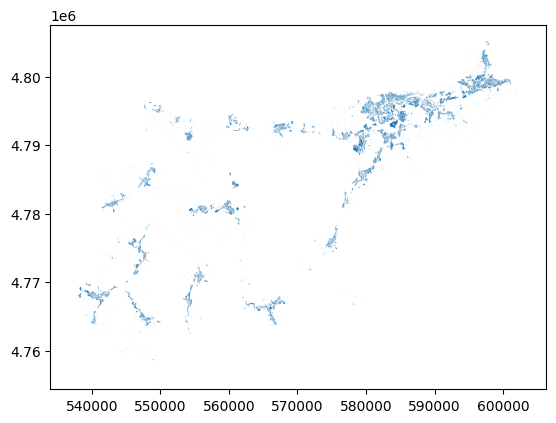

In [29]:
buildings_w_section.plot()